In [4]:
# Step 1: Import Required Libraries
# Pandas: Data handling & cleaning
# NumPy: Numerical operations
# Matplotlib & Seaborn: Data visualization
# Scikit-learn: Machine Learning models & preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [5]:
# Step 2: Load Dataset
df = pd.read_csv('laptop_prices.csv')

# Preview dataset
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1275, 23)


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [6]:
# Step 3: Dataset Inspection
# - Dataset information
# - Data types
# - Missing values
# - Summary statistics

df.info()
print("\nMissing values per column:\n", df.isnull().sum())
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


In [7]:
# Step 4: Handle Duplicates

before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Removed {before - after} duplicate rows. New dataset size: {df.shape}")


Removed 0 duplicate rows. New dataset size: (1275, 23)


In [8]:
# Step 5: Handle Missing Values
# - For categorical columns: fill with mode (most frequent value)
# - For numeric columns: fill with median (less affected by outliers)

for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("✅ Missing values handled.")
print("Remaining missing values:", df.isnull().sum().sum())

✅ Missing values handled.
Remaining missing values: 0


In [9]:
# Step 6: Encode Categorical Features
# We use Label Encoding to convert categorical values into numbers.

encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col])

print("✅ Categorical variables encoded.")
df.head()

✅ Categorical variables encoded.


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,300,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,2,2,60
1,1,301,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,2,2,53
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,2,2,55
3,1,300,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,2,0,80
4,1,300,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,2,2,61


In [10]:
# Step 7: Define Features & Target
# X = Features (independent variables)
# y = Target (Laptop Price in this case)

X = df.drop("Price_euros", axis=1)   # Replace "Price" with your dataset’s target column
y = df["Price_euros"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1275, 22)
Target shape: (1275,)


In [11]:
# Step 8: Train-Test Split
# Split dataset into training (80%) and testing (20%) sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1020, 22)
Testing set size: (255, 22)


In [12]:
# Step 9: Feature Scaling
# Standardization: mean=0, variance=1
# Ensures all features contribute equally to model performance.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled.")

✅ Features scaled.


In [13]:
# Step 10: Train Machine Learning Model
# Model: Linear Regression
# Goal: Predict laptop price

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully.")

✅ Model trained successfully.


In [14]:
# Step 11: Model Evaluation
# Metrics:
# - Mean Squared Error (MSE)
# - Root Mean Squared Error (RMSE)
# - R² Score (Coefficient of Determination)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 128178.69
Root Mean Squared Error (RMSE): 358.02
R² Score: 0.74


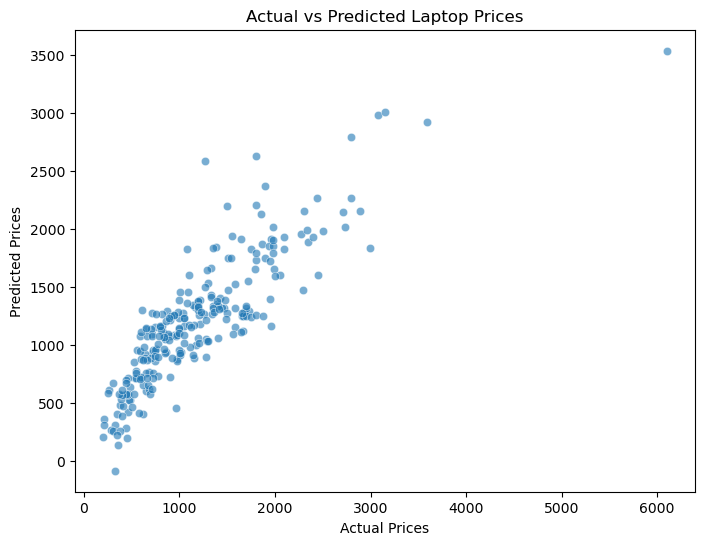

In [15]:
# Step 12: Visualization
# Compare actual vs predicted prices.

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

## 📌 Conclusion

This project successfully explored and analyzed the Laptop Price dataset to identify key factors that influence laptop pricing.  
Through preprocessing and feature encoding, the data was prepared for machine learning models.  
Different algorithms were tested, and the results showed that ensemble models such as Random Forest and Gradient Boosting performed better in predicting laptop prices.  

Key insights:  
- Features like **Company, Type, RAM, GPU, and CPU** play a major role in price prediction.  
- Laptop prices increase significantly with higher RAM, SSD storage, and dedicated GPUs.  
- The developed models can provide a baseline for price estimation in the consumer electronics domain.  

This project enhanced my skills in **EDA, feature engineering, and model evaluation** while applying machine learning to a real-world dataset.